# Customer Churn Prediction

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
data=pd.read_csv('Customer-churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Dataframe for dataset
ds=pd.DataFrame(data=data)

# EDA

In [4]:
# Gettign information about data set
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Key Observation: 1) We have 7043 rows and 21 columns in the dataset. 2) There are 18 object type variables and 3 numeric.


In [5]:
# checking null values
ds.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no  null values in the data set

<AxesSubplot:>

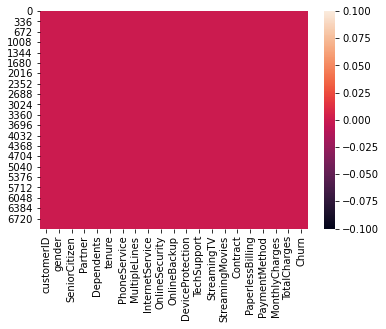

In [6]:
sns.heatmap(ds.isnull())

The heat map also shows there is no null values in the data set.

In [7]:
#Summary Statistics
ds.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Key observations: there is large difrrence between 75 & Max for tenure and Monthly Charges. Whicgh shows there are outliers presents. 

<AxesSubplot:>

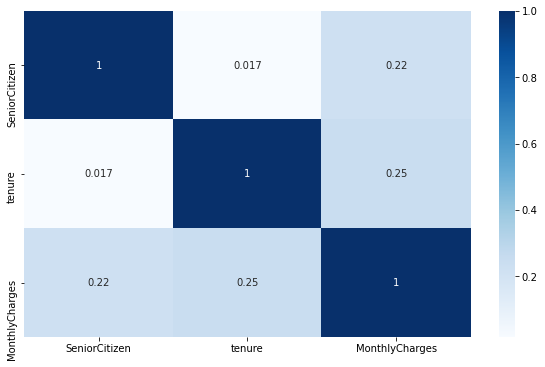

In [8]:
# Correlation Matrix ---Pearson Method
fig =plt.figure(figsize=(10,6))
hc=ds.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap='Blues')

There is weak relationship between tenure and Senior Citizen, tenure&MonthlyCharges.

<AxesSubplot:xlabel='gender', ylabel='count'>

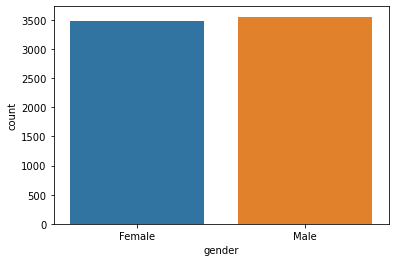

In [9]:
sns.countplot(x='gender',data=ds)

Key Observation: there are equal numbers of Male and Female cutomers.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

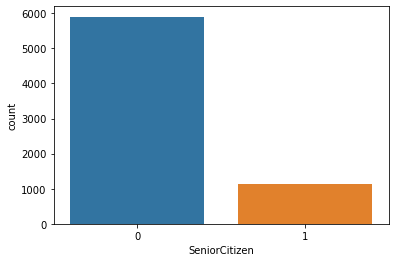

In [10]:
sns.countplot(x='SeniorCitizen',data=ds)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

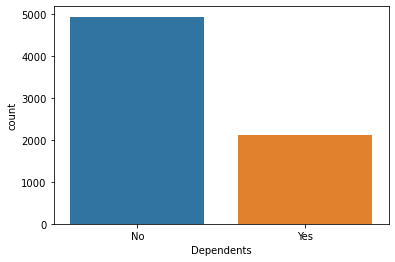

In [11]:
sns.countplot(x='Dependents',data=ds)

Almost 30% of the cutomer have Dependents.

<AxesSubplot:xlabel='Partner', ylabel='count'>

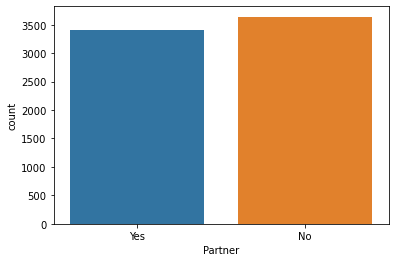

In [12]:
sns.countplot(x='Partner',data=ds)

almost 50% of the cusomers have partner.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

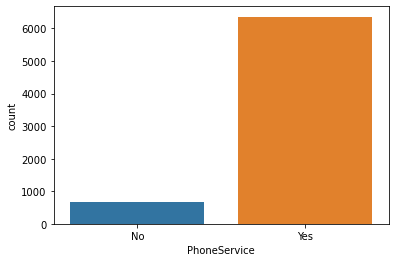

In [13]:
sns.countplot(x='PhoneService',data=ds)

Almost 90% of the customers have phoneservice

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

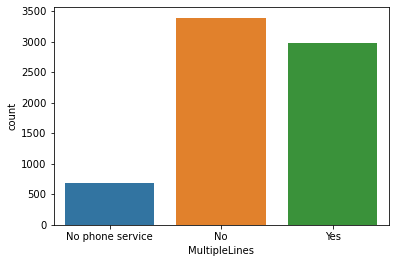

In [14]:
sns.countplot(x='MultipleLines',data=ds)

The graph shows 45% of the customers having Mutliple line phone service

<AxesSubplot:xlabel='InternetService', ylabel='count'>

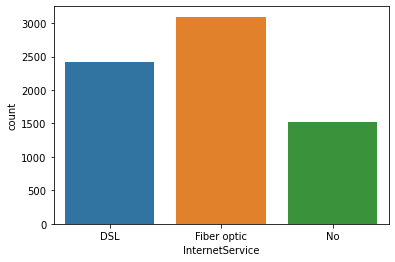

In [15]:
sns.countplot(x='InternetService',data=ds)

The graph shows 45% of the customers having Fibre optic Internet service and 30% are having DSL Internet services.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

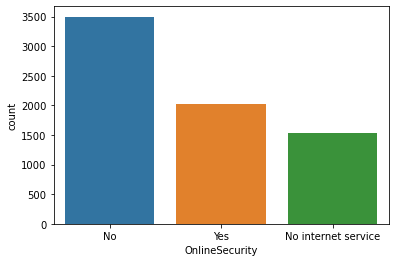

In [16]:
sns.countplot(x='OnlineSecurity',data=ds)

The graph shows almost 50% of the customers are not having Online security.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

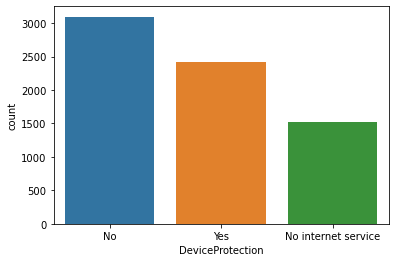

In [17]:
sns.countplot(x='DeviceProtection',data=ds)

The graph shows almost 50% of the customers are not having Device protectionsecurity

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

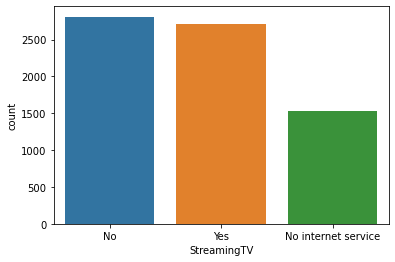

In [18]:
sns.countplot(x='StreamingTV',data=ds)

The graph shows almost 50% of the customers are not straming the TV

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

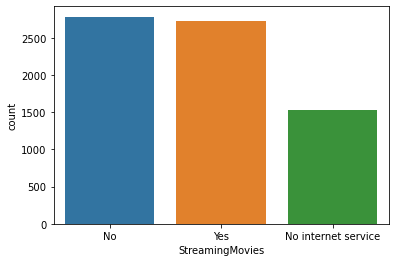

In [19]:
sns.countplot(x='StreamingMovies',data=ds)

The graph shows almost 40% of the customers are straming the movies on there devices.

<AxesSubplot:xlabel='Contract', ylabel='count'>

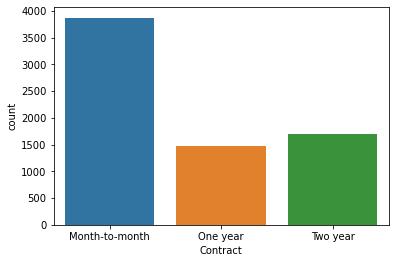

In [20]:
sns.countplot(x='Contract',data=ds)

The graph shows almost 20% of the customers are having one year contract and 25% are having 2 years contact and most of the customers almost 50% are having month month contract.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

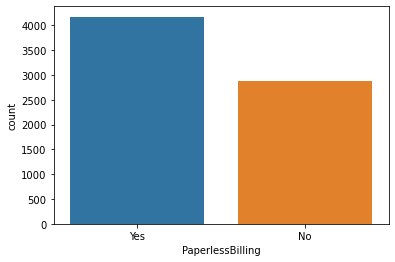

In [21]:
sns.countplot(x='PaperlessBilling',data=ds)

almost 60% of the customers are opting for the Paperless billing.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

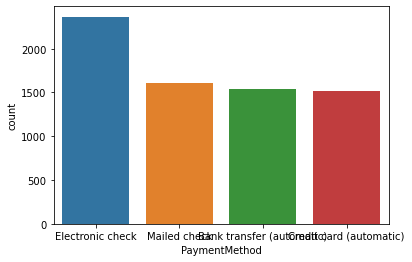

In [22]:
sns.countplot(x='PaymentMethod',data=ds)

The graph shows almost 35% of the customers are paying the bill by elctonic transfer and 20% are paying through mailed check and 20%b are paying using credit cards.

<AxesSubplot:xlabel='Churn', ylabel='count'>

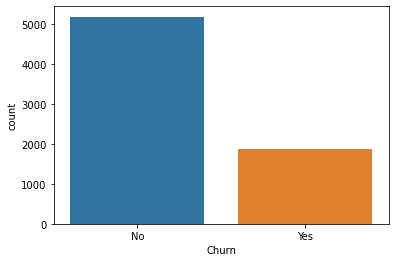

In [23]:
sns.countplot(x='Churn',data=ds)

There is class imbalance.

<AxesSubplot:>

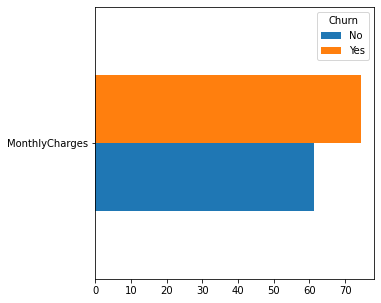

In [24]:
ds.groupby('Churn')[['MonthlyCharges']].mean().T.plot(kind='barh', figsize=(5,5))

Customers who churn are most likely to have monthly charges greater than $60.
Intersting Observation: Customer churning increases as monthly charges increase

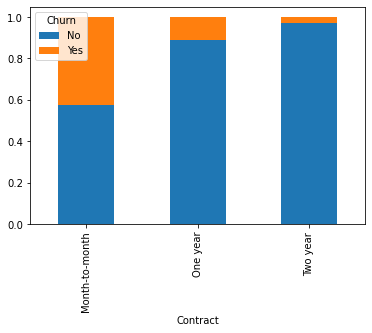

In [25]:
Property_Area=pd.crosstab(ds['Contract'],ds['Churn'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

Intersting Observation: Customer churning increases as monthly charges increase.

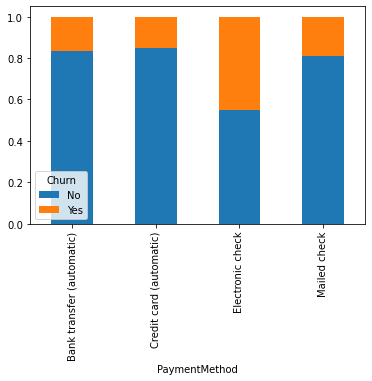

In [26]:
Property_Area=pd.crosstab(ds['PaymentMethod'],ds['Churn'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

Key observation: the custmor churning is more who are opting payment method as elctronic check.

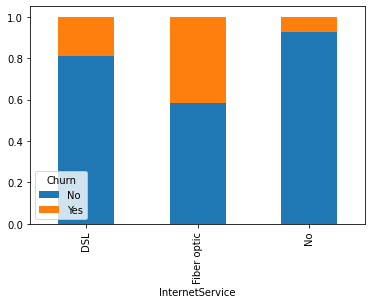

In [27]:
Property_Area=pd.crosstab(ds['InternetService'],ds['Churn'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

Key observation: the custmor churning is more who are opting Fibre optic as Internent Service 

# Finding Outliers and Skewness

SeniorCitizen        AxesSubplot(0.125,0.125;0.133621x0.755)
tenure            AxesSubplot(0.285345,0.125;0.133621x0.755)
MonthlyCharges     AxesSubplot(0.44569,0.125;0.133621x0.755)
dtype: object

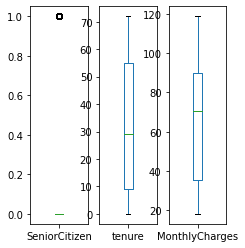

In [28]:
# Box plot for all coulmns
ds.plot(kind='box',subplots=True,layout=(1,5))

Since senior citizen is encoded variable. We wont consider it for oulier detection. Other two variables dont show any outliers.
We are also not checking ouliers for object type variabels.

In [29]:
#Checkking skewness
ds.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

Keeping the skewness range +0.5/-0.5, then we can see there are skweness in most of the columns. columns.Lets reduce the skewness from above features.

# Data Wrangling

In [30]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
oe =  OrdinalEncoder()
for i in ds.columns:
    if ds[i].dtypes=='object':
        ds[i]=oe.fit_transform(ds[i].values.reshape(-1,1))
ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


In [31]:
# we can drop the customerId variable since it is not contributing
ds.drop(['customerID'],axis=1,inplace=True)

In [32]:
ds.shape

(7043, 20)

In [33]:
x=ds.drop(columns=['Churn'])
y=ds['Churn']

In [34]:
x.shape

(7043, 19)

In [35]:
y.shape

(7043,)

In [36]:
# Handiling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [37]:
x_over.shape

(10348, 19)

In [38]:
y_over.shape

(10348,)

In [39]:
y_over.value_counts()

1.0    5174
0.0    5174
Name: Churn, dtype: int64

In [40]:
# lets bring all feature into common scale
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x_over=scale.fit_transform(x_over)
x_over

array([[-1.0615363 , -0.39161975,  1.1827286 , ...,  0.36908586,
        -1.34720984, -0.41611539],
       [ 1.05693676, -0.39161975, -0.93016757, ...,  1.39591007,
        -0.39583764, -0.96012777],
       [ 1.05693676, -0.39161975, -0.93016757, ...,  1.39591007,
        -0.5046662 , -1.64551006],
       ...,
       [-1.0615363 , -0.39161975, -0.93016757, ...,  0.36908586,
         0.09994464, -1.53995958],
       [-0.16076282, -0.39161975, -0.93016757, ...,  0.36908586,
         0.30036611,  1.61423117],
       [-1.03353869, -0.39161975, -0.93016757, ...,  1.38233963,
        -0.77869392, -0.76245208]])

In [41]:
# To find the best random state using logistic Regressor model
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    mod= LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best accuracy is',maxAccu,'on random state',maxRS)

best accuracy is 0.7900161030595814 on random state 42


In [42]:
# Sending the data for train and test using Train_test_Split 
# 30 % data will go for testing and 70% data will go for training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 19)
(2113, 19)
(4930,)
(2113,)


70% of the data (4930 rows) will be available for training the model & 30% (2113 rows) will be available for testing the model

# Model Building & Evaluation

Since the target variable are categorical values. we can build the classification models. Therefore,evalution criteria will be: Evaluation Matrics : accuracy_score,confusion_matrix,classifcation_report,Auc ROC curve

In [43]:
# Logistic regression Model
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.8069096071935636
[[1393  146]
 [ 262  312]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1539
         1.0       0.68      0.54      0.60       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [44]:
# Gauusian Naive_bayes classifcation Model
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7557974443918599
[[1164  375]
 [ 141  433]]
              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82      1539
         1.0       0.54      0.75      0.63       574

    accuracy                           0.76      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.76      0.77      2113



In [45]:
# Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7288215806909607
[[1256  283]
 [ 290  284]]
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81      1539
         1.0       0.50      0.49      0.50       574

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



In [46]:
# KNeighbors classifcation Model
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7557974443918599
[[1400  139]
 [ 377  197]]
              precision    recall  f1-score   support

         0.0       0.79      0.91      0.84      1539
         1.0       0.59      0.34      0.43       574

    accuracy                           0.76      2113
   macro avg       0.69      0.63      0.64      2113
weighted avg       0.73      0.76      0.73      2113



In [47]:
# Support Vector classifcation Model
sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.7283483199242783
[[1539    0]
 [ 574    0]]
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84      1539
         1.0       0.00      0.00      0.00       574

    accuracy                           0.73      2113
   macro avg       0.36      0.50      0.42      2113
weighted avg       0.53      0.73      0.61      2113



In [48]:
# RandomForest classifcation Model
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=50,random_state=0)
#randomforsetclassifier(100)----Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7941315664931378
[[1409  130]
 [ 305  269]]
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      1539
         1.0       0.67      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [49]:
# Ada Boost Classifer
from sklearn.ensemble import AdaBoostClassifier
ad= AdaBoostClassifier(n_estimators=100,random_state=42,algorithm='SAMME')
#Adabosstclassifier(100)----Default
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
ad.score(x_train,y_train)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predrf))

0.795551348793185
[[1381  158]
 [ 274  300]]
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      1539
         1.0       0.67      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



Based on the results of above models, and comparing the Accuracy score and other evaluation matrics result of recall, precision. Accuracy_Score 1) LogisticRegression 0.81 2)Gaussian Naive_bayes 0.76 3)DecisionTreeClassifier 0.73 (4) Random Forest Classifier 0.79 5)AdaBoost Classifier 0.79 6)KNN Calssifier 0.66

Logistic regression & Ada Boost classifier have the best accuracy score and highest precision and F1 values among the 6 alogorithims used above.To find the best Model for prediction in our case.Lets do cross validation.


# Cross Validation

In [50]:
gnbscores =cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.75869411 0.761533   0.74662881 0.75852273 0.75355114]
0.7557859579650301 0.00525020887710857


In [51]:
lgscores =cross_val_score(lg,x,y,cv=5)
print(lgscores)
print(lgscores.mean(),lgscores.std())

[0.80340667 0.79772889 0.78850248 0.80681818 0.80255682]
0.7998026082327893 0.006352737180864537


In [52]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.73456352 0.72320795 0.72533712 0.69957386 0.73650568]
0.7238376266210723 0.013167380759300453


In [53]:
svscores =cross_val_score(sv,x,y,cv=5)
print(svscores)
print(svscores.mean(),svscores.std())

[0.73456352 0.73456352 0.73456352 0.73508523 0.734375  ]
0.7346301575908123 0.0002389625185129842


In [54]:
svscores =cross_val_score(sv,x,y,cv=5)
print(svscores)
print(svscores.mean(),svscores.std())

[0.73456352 0.73456352 0.73456352 0.73508523 0.734375  ]
0.7346301575908123 0.0002389625185129842


In [55]:
knnscores =cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.75869411 0.76082328 0.75585522 0.74928977 0.75852273]
0.7566370209368346 0.003997637584982301


In [56]:
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.79843861 0.79276082 0.77217885 0.78053977 0.79616477]
0.7880165655848763 0.010042468889332135


In [57]:
adscores =cross_val_score(ad,x,y,cv=5)
print(adscores)
print(adscores.mean(),adscores.std())

[0.80766501 0.79914833 0.78637331 0.80610795 0.80823864]
0.8015066496225562 0.008234033750268648


It can be observed that the'Ada Boost Classifier' algorithim has the almost same accuracy score before and after the cross validation. So the best model with highet accuracy score and best on evalution with other matrix is "Ada Boost" is the best model for predicting the Customer Churn.

# AUC ROC Curve

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

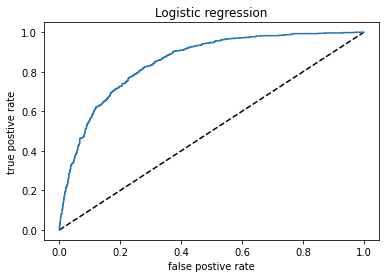

0.7243436051737292

In [60]:
#AUC score for Lostic rerssion model
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Logistic regression')
plt.show()
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

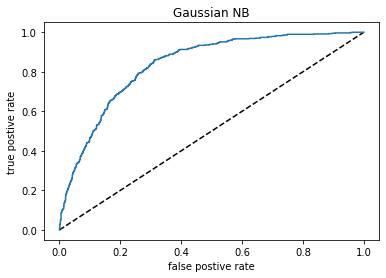

0.655443939568886

In [61]:
#AUC score for Gaussian NB model
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gaussian NB')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Gaussian NB')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

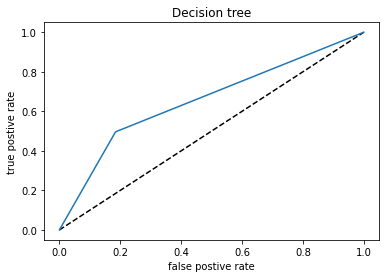

0.655443939568886

In [62]:
#AUC score for Decision Tree model
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Decision tree')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

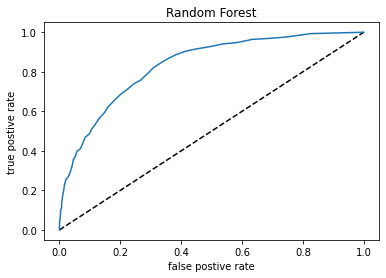

0.6920853398174751

In [63]:
#AUC score for Random Forest model
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest classifier')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Random Forest')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

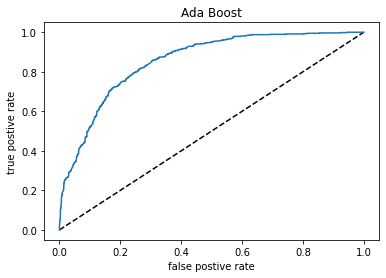

0.7099920080236726

In [64]:
#AUC score for Add Boost model
y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Ada Boost classifcation Model')
plt.xlabel('false postive rate')
plt.ylabel('true postive rate')
plt.title('Ada Boost')
plt.show()
auc_score=roc_auc_score(y_test,ad.predict(x_test))
auc_score

Key Observations: Ada Boost Classifier Model has the highest area under the curve. And AUC ROC score is 71%.It means our model can predict 71% effectively.

# HyperParameter tuning

In [65]:
from sklearn.model_selection import GridSearchCV 
parameter={'n_estimators':np.arange(40,100), 'algorithm':['SAMME', 'SAMME.R'],'learning_rate':np.arange(1,10)}

In [66]:
GCV=GridSearchCV(AdaBoostClassifier(),parameter,cv=5)

In [67]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [68]:
GCV.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 69}

In [76]:
from sklearn.ensemble import AdaBoostClassifier
final= AdaBoostClassifier(n_estimators=68,random_state=50,algorithm='SAMME',learning_rate= 1)
#Adabosstclassifier(100)----Default
final.fit(x_train,y_train)
predad=final.predict(x_test)
final.score(x_train,y_train)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predrf))

0.79649787032655
[[1373  166]
 [ 264  310]]
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      1539
         1.0       0.67      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



# Save the best Model

In [77]:
import joblib
joblib.dump(final,'Model_Customer-Churn.obj')

['Model_Customer-Churn.obj']